In [3]:
from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
from sklearn.metrics import silhouette_score
import streamlit as st
import pandas as pd 
import numpy as np 
from nba_api.stats.endpoints import LeagueGameLog
from nba_api.stats.endpoints import teamgamelogs

from sklearn.cluster import KMeans
import datetime
import os

In [4]:
from nba_api.stats.endpoints import LeagueDashTeamPtShot
from nba_api.stats.endpoints import LeagueHustleStatsTeam
from nba_api.stats.endpoints import LeagueDashOppPtShot

In [5]:
from nba_api.stats.endpoints import teamgamelogs, playergamelogs,leaguedashteamstats

# Defense table construction

## opponent general defensive stats per 100 poss

## hustle stats need to be normalized using pace from general stats atvle


In [19]:
gen_opp_def = leaguedashteamstats.LeagueDashTeamStats(per_mode_detailed="Per100Possessions", measure_type_detailed_defense="Opponent", league_id_nullable="00")

In [49]:
gen_opp_def_stats = gen_opp_def.get_data_frames()[0]
gen_opp_def_stats.columns
print(gen_opp_def_stats.columns
, 'gen opp defense , per 100')

Index(['TEAM_ID', 'TEAM_NAME', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'OPP_FGM',
       'OPP_FGA', 'OPP_FG_PCT', 'OPP_FG3M', 'OPP_FG3A', 'OPP_FG3_PCT',
       'OPP_FTM', 'OPP_FTA', 'OPP_FT_PCT', 'OPP_OREB', 'OPP_DREB', 'OPP_REB',
       'OPP_AST', 'OPP_TOV', 'OPP_STL', 'OPP_BLK', 'OPP_BLKA', 'OPP_PF',
       'OPP_PFD', 'OPP_PTS', 'PLUS_MINUS', 'GP_RANK', 'W_RANK', 'L_RANK',
       'W_PCT_RANK', 'MIN_RANK', 'OPP_FGM_RANK', 'OPP_FGA_RANK',
       'OPP_FG_PCT_RANK', 'OPP_FG3M_RANK', 'OPP_FG3A_RANK', 'OPP_FG3_PCT_RANK',
       'OPP_FTM_RANK', 'OPP_FTA_RANK', 'OPP_FT_PCT_RANK', 'OPP_OREB_RANK',
       'OPP_DREB_RANK', 'OPP_REB_RANK', 'OPP_AST_RANK', 'OPP_TOV_RANK',
       'OPP_STL_RANK', 'OPP_BLK_RANK', 'OPP_BLKA_RANK', 'OPP_PF_RANK',
       'OPP_PFD_RANK', 'OPP_PTS_RANK', 'PLUS_MINUS_RANK'],
      dtype='object') gen opp defense , per 100


In [63]:
gen_opp_def_stats = gen_opp_def_stats[["TEAM_ID",
"TEAM_NAME",
"OPP_TOV"
]]

In [64]:
gen_opp_def_stats

,TEAM_ID,TEAM_NAME,OPP_TOV
0,1610612737,Atlanta Hawks,15.4
1,1610612738,Boston Celtics,14.0
2,1610612751,Brooklyn Nets,14.4
3,1610612766,Charlotte Hornets,12.5
4,1610612741,Chicago Bulls,12.2
5,1610612739,Cleveland Cavaliers,15.4
6,1610612742,Dallas Mavericks,13.3
7,1610612743,Denver Nuggets,12.2
8,1610612765,Detroit Pistons,17.1
9,1610612744,Golden State Warriors,15.5


In [22]:
gen_opp_def_extra = leaguedashteamstats.LeagueDashTeamStats(per_mode_detailed="Per100Possessions", measure_type_detailed_defense="Defense", league_id_nullable="00")

In [48]:
gen_opp_def_extra_stats = gen_opp_def_extra.get_data_frames()[0]
gen_opp_def_extra_stats.columns
print(gen_opp_def_extra_stats.columns
, 'gen opp defense extra , per 100')

Index(['TEAM_ID', 'TEAM_NAME', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'DEF_RATING',
       'DREB', 'DREB_PCT', 'STL', 'BLK', 'OPP_PTS_OFF_TOV',
       'OPP_PTS_2ND_CHANCE', 'OPP_PTS_FB', 'OPP_PTS_PAINT', 'GP_RANK',
       'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'DEF_RATING_RANK',
       'DREB_RANK', 'DREB_PCT_RANK', 'STL_RANK', 'BLK_RANK',
       'OPP_PTS_OFF_TOV_RANK', 'OPP_PTS_2ND_CHANCE_RANK', 'OPP_PTS_FB_RANK',
       'OPP_PTS_PAINT_RANK'],
      dtype='object') gen opp defense extra , per 100


In [61]:
gen_opp_def_extra_stats = gen_opp_def_extra_stats[["TEAM_ID",
"TEAM_NAME",
"DEF_RATING",
"OPP_PTS_OFF_TOV",
"OPP_PTS_2ND_CHANCE",
"OPP_PTS_FB",
"OPP_PTS_PAINT"
]]

In [62]:
gen_opp_def_extra_stats

,TEAM_ID,TEAM_NAME,DEF_RATING,OPP_PTS_OFF_TOV,OPP_PTS_2ND_CHANCE,OPP_PTS_FB,OPP_PTS_PAINT
0,1610612737,Atlanta Hawks,114.8,17.3,14.4,16.6,50.5
1,1610612738,Boston Celtics,114.0,14.6,16.0,13.8,42.8
2,1610612751,Brooklyn Nets,117.4,19.5,15.2,17.6,54.2
3,1610612766,Charlotte Hornets,116.7,19.4,14.5,15.9,52.5
4,1610612741,Chicago Bulls,117.0,16.6,15.2,14.7,51.8
5,1610612739,Cleveland Cavaliers,114.6,17.7,14.0,16.0,45.4
6,1610612742,Dallas Mavericks,112.6,17.4,14.8,15.0,54.0
7,1610612743,Denver Nuggets,116.8,16.5,14.4,15.3,51.3
8,1610612765,Detroit Pistons,108.5,17.1,14.7,14.2,42.1
9,1610612744,Golden State Warriors,112.2,19.6,15.3,15.6,50.3


In [30]:
gen_opp_def_four_factors = leaguedashteamstats.LeagueDashTeamStats(per_mode_detailed="Per100Possessions", measure_type_detailed_defense="Four Factors", league_id_nullable="00")

In [47]:
gen_opp_def_four_factors_stats = gen_opp_def_four_factors.get_data_frames()[0]
gen_opp_def_four_factors_stats.columns
print(gen_opp_def_four_factors_stats.columns, 'four factors , per 100')

Index(['TEAM_ID', 'TEAM_NAME', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'EFG_PCT',
       'FTA_RATE', 'TM_TOV_PCT', 'OREB_PCT', 'OPP_EFG_PCT', 'OPP_FTA_RATE',
       'OPP_TOV_PCT', 'OPP_OREB_PCT', 'GP_RANK', 'W_RANK', 'L_RANK',
       'W_PCT_RANK', 'MIN_RANK', 'EFG_PCT_RANK', 'FTA_RATE_RANK',
       'TM_TOV_PCT_RANK', 'OREB_PCT_RANK', 'OPP_EFG_PCT_RANK',
       'OPP_FTA_RATE_RANK', 'OPP_TOV_PCT_RANK', 'OPP_OREB_PCT_RANK'],
      dtype='object') four factors , per 100


In [59]:
gen_opp_def_four_factors_stats = gen_opp_def_four_factors_stats[["TEAM_ID",
"TEAM_NAME",
"EFG_PCT",
"FTA_RATE",
"TM_TOV_PCT",
"OREB_PCT",
"OPP_EFG_PCT",
"OPP_FTA_RATE",
"OPP_TOV_PCT",
"OPP_OREB_PCT"
]]

In [60]:
gen_opp_def_four_factors_stats

,TEAM_ID,TEAM_NAME,EFG_PCT,FTA_RATE,TM_TOV_PCT,OREB_PCT,OPP_EFG_PCT,OPP_FTA_RATE,OPP_TOV_PCT,OPP_OREB_PCT
0,1610612737,Atlanta Hawks,0.553,0.234,0.141,0.269,0.553,0.272,0.154,0.305
1,1610612738,Boston Celtics,0.558,0.211,0.126,0.336,0.530,0.263,0.139,0.313
2,1610612751,Brooklyn Nets,0.532,0.273,0.156,0.301,0.561,0.263,0.144,0.321
3,1610612766,Charlotte Hornets,0.547,0.257,0.156,0.348,0.555,0.230,0.125,0.277
4,1610612741,Chicago Bulls,0.552,0.240,0.138,0.280,0.548,0.252,0.122,0.287
5,1610612739,Cleveland Cavaliers,0.551,0.252,0.140,0.302,0.547,0.276,0.154,0.309
6,1610612742,Dallas Mavericks,0.536,0.278,0.147,0.275,0.525,0.246,0.133,0.303
7,1610612743,Denver Nuggets,0.580,0.288,0.128,0.283,0.543,0.258,0.121,0.302
8,1610612765,Detroit Pistons,0.541,0.302,0.157,0.359,0.514,0.332,0.171,0.309
9,1610612744,Golden State Warriors,0.554,0.249,0.153,0.302,0.538,0.243,0.155,0.315


In [6]:
hustle = LeagueHustleStatsTeam(per_mode_time="PerGame", season="2025-26")


In [46]:
hustle_stats = hustle.get_data_frames()[0]
hustle_stats.columns
print(hustle_stats.columns
, 'hustle stats , per game')

Index(['TEAM_ID', 'TEAM_NAME', 'MIN', 'CONTESTED_SHOTS', 'CONTESTED_SHOTS_2PT',
       'CONTESTED_SHOTS_3PT', 'DEFLECTIONS', 'CHARGES_DRAWN', 'SCREEN_ASSISTS',
       'SCREEN_AST_PTS', 'OFF_LOOSE_BALLS_RECOVERED',
       'DEF_LOOSE_BALLS_RECOVERED', 'LOOSE_BALLS_RECOVERED',
       'PCT_LOOSE_BALLS_RECOVERED_OFF', 'PCT_LOOSE_BALLS_RECOVERED_DEF',
       'OFF_BOXOUTS', 'DEF_BOXOUTS', 'BOX_OUTS', 'PCT_BOX_OUTS_OFF',
       'PCT_BOX_OUTS_DEF'],
      dtype='object') hustle stats , per game


In [57]:
hustle_stats = hustle_stats[["TEAM_ID",
"TEAM_NAME",
"CONTESTED_SHOTS",
"CONTESTED_SHOTS_3PT",
"DEFLECTIONS",
"CHARGES_DRAWN",
"DEF_BOXOUTS",
"DEF_LOOSE_BALLS_RECOVERED"
]]

In [58]:
hustle_stats

,TEAM_ID,TEAM_NAME,CONTESTED_SHOTS,CONTESTED_SHOTS_3PT,DEFLECTIONS,CHARGES_DRAWN,DEF_BOXOUTS,DEF_LOOSE_BALLS_RECOVERED
0,1610612737,Atlanta Hawks,43.33,16.87,19.47,0.16,5.33,2.84
1,1610612738,Boston Celtics,41.17,16.33,16.64,0.38,5.17,2.40
2,1610612751,Brooklyn Nets,40.12,15.00,17.54,0.17,3.98,2.20
3,1610612766,Charlotte Hornets,43.88,15.95,14.51,0.14,5.35,2.00
4,1610612741,Chicago Bulls,45.10,17.12,14.57,0.60,6.19,2.17
5,1610612739,Cleveland Cavaliers,41.57,14.45,20.14,0.14,5.30,2.48
6,1610612742,Dallas Mavericks,44.27,15.75,14.98,0.43,4.82,3.02
7,1610612743,Denver Nuggets,36.33,13.63,14.72,0.33,4.33,2.16
8,1610612765,Detroit Pistons,43.02,16.27,20.54,0.17,5.41,3.51
9,1610612744,Golden State Warriors,40.84,14.86,19.68,0.64,4.95,2.70


In [33]:
advanced_nba = leaguedashteamstats.LeagueDashTeamStats(per_mode_detailed="Per100Possessions", measure_type_detailed_defense="Advanced", league_id_nullable="00")

In [45]:
advanced_nba_stats = advanced_nba.get_data_frames()[0]
advanced_nba_stats.columns
print(advanced_nba_stats.columns, 'adv nba , per 100')

Index(['TEAM_ID', 'TEAM_NAME', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'E_OFF_RATING',
       'OFF_RATING', 'E_DEF_RATING', 'DEF_RATING', 'E_NET_RATING',
       'NET_RATING', 'AST_PCT', 'AST_TO', 'AST_RATIO', 'OREB_PCT', 'DREB_PCT',
       'REB_PCT', 'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT', 'E_PACE', 'PACE',
       'PACE_PER40', 'POSS', 'PIE', 'GP_RANK', 'W_RANK', 'L_RANK',
       'W_PCT_RANK', 'MIN_RANK', 'OFF_RATING_RANK', 'DEF_RATING_RANK',
       'NET_RATING_RANK', 'AST_PCT_RANK', 'AST_TO_RANK', 'AST_RATIO_RANK',
       'OREB_PCT_RANK', 'DREB_PCT_RANK', 'REB_PCT_RANK', 'TM_TOV_PCT_RANK',
       'EFG_PCT_RANK', 'TS_PCT_RANK', 'PACE_RANK', 'PIE_RANK'],
      dtype='object') adv nba , per 100


In [55]:
advanced_nba_stats = advanced_nba_stats[["TEAM_ID",
"TEAM_NAME",
"OFF_RATING",
"DEF_RATING",
"NET_RATING",
"AST_PCT",
"TM_TOV_PCT",
"EFG_PCT",
"TS_PCT",
"PACE",
"PIE"
]]

In [56]:
advanced_nba_stats

,TEAM_ID,TEAM_NAME,OFF_RATING,DEF_RATING,NET_RATING,AST_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,PACE,PIE
0,1610612737,Atlanta Hawks,113.4,114.8,-1.4,0.717,0.141,0.553,0.583,103.13,0.494
1,1610612738,Boston Celtics,121.4,114.0,7.4,0.551,0.126,0.558,0.588,96.32,0.524
2,1610612751,Brooklyn Nets,112.3,117.4,-5.1,0.671,0.156,0.532,0.570,96.92,0.459
3,1610612766,Charlotte Hornets,116.9,116.7,0.2,0.647,0.156,0.547,0.586,98.96,0.498
4,1610612741,Chicago Bulls,114.0,117.0,-3.0,0.688,0.138,0.552,0.585,102.40,0.496
5,1610612739,Cleveland Cavaliers,116.5,114.6,1.9,0.661,0.140,0.551,0.585,102.30,0.507
6,1610612742,Dallas Mavericks,110.4,112.6,-2.2,0.604,0.147,0.536,0.570,102.30,0.494
7,1610612743,Denver Nuggets,121.7,116.8,4.9,0.650,0.128,0.580,0.619,99.13,0.528
8,1610612765,Detroit Pistons,116.0,108.5,7.4,0.621,0.157,0.541,0.577,100.79,0.546
9,1610612744,Golden State Warriors,115.7,112.2,3.5,0.701,0.153,0.554,0.592,100.41,0.514


In [35]:
misc_nba = leaguedashteamstats.LeagueDashTeamStats(per_mode_detailed="Per100Possessions", measure_type_detailed_defense="Misc", league_id_nullable="00")

In [44]:
misc_nba_stats = misc_nba.get_data_frames()[0]
misc_nba_stats.columns
print(misc_nba_stats.columns , 'misc , per 100')

Index(['TEAM_ID', 'TEAM_NAME', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'PTS_OFF_TOV',
       'PTS_2ND_CHANCE', 'PTS_FB', 'PTS_PAINT', 'OPP_PTS_OFF_TOV',
       'OPP_PTS_2ND_CHANCE', 'OPP_PTS_FB', 'OPP_PTS_PAINT', 'GP_RANK',
       'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'PTS_OFF_TOV_RANK',
       'PTS_2ND_CHANCE_RANK', 'PTS_FB_RANK', 'PTS_PAINT_RANK',
       'OPP_PTS_OFF_TOV_RANK', 'OPP_PTS_2ND_CHANCE_RANK', 'OPP_PTS_FB_RANK',
       'OPP_PTS_PAINT_RANK'],
      dtype='object') misc , per 100


In [53]:
misc_nba_stats = misc_nba_stats[["TEAM_ID",
"TEAM_NAME",
"PTS_OFF_TOV",
"PTS_2ND_CHANCE",
"PTS_FB",
"PTS_PAINT",
"OPP_PTS_OFF_TOV",
"OPP_PTS_2ND_CHANCE",
"OPP_PTS_FB",
"OPP_PTS_PAINT"
]]

In [54]:
misc_nba_stats

,TEAM_ID,TEAM_NAME,PTS_OFF_TOV,PTS_2ND_CHANCE,PTS_FB,PTS_PAINT,OPP_PTS_OFF_TOV,OPP_PTS_2ND_CHANCE,OPP_PTS_FB,OPP_PTS_PAINT
0,1610612737,Atlanta Hawks,19.4,13.7,17.2,50.0,17.3,14.4,16.6,50.5
1,1610612738,Boston Celtics,18.2,18.2,13.6,45.8,14.6,16.0,13.8,42.8
2,1610612751,Brooklyn Nets,16.7,15.0,12.5,44.1,19.5,15.2,17.6,54.2
3,1610612766,Charlotte Hornets,15.4,17.3,13.1,48.6,19.4,14.5,15.9,52.5
4,1610612741,Chicago Bulls,15.3,13.2,17.1,53.1,16.6,15.2,14.7,51.8
5,1610612739,Cleveland Cavaliers,19.0,15.3,15.2,48.8,17.7,14.0,16.0,45.4
6,1610612742,Dallas Mavericks,15.7,11.9,18.1,51.5,17.4,14.8,15.0,54.0
7,1610612743,Denver Nuggets,14.2,13.9,15.1,49.1,16.5,14.4,15.3,51.3
8,1610612765,Detroit Pistons,21.5,16.7,17.9,56.2,17.1,14.7,14.2,42.1
9,1610612744,Golden State Warriors,19.5,15.3,12.2,42.9,19.6,15.3,15.6,50.3


In [38]:
shot_def = (LeagueDashOppPtShot(season_type_all_star="Regular Season", per_mode_simple="PerGame" ))

In [66]:
opp_shot_splits = shot_def.get_data_frames()[0]
print(opp_shot_splits.columns)
print('opp shots , per game')


Index(['TEAM_ID', 'TEAM_NAME', 'TEAM_ABBREVIATION', 'GP', 'G', 'FGA_FREQUENCY',
       'FGM', 'FGA', 'FG_PCT', 'EFG_PCT', 'FG2A_FREQUENCY', 'FG2M', 'FG2A',
       'FG2_PCT', 'FG3A_FREQUENCY', 'FG3M', 'FG3A', 'FG3_PCT'],
      dtype='object')
opp shots , per game


In [67]:
opp_shot_splits = opp_shot_splits[["TEAM_ID",
"TEAM_NAME",
"TEAM_ABBREVIATION",
"FGA_FREQUENCY",
"FG2A_FREQUENCY",
"FG3A_FREQUENCY",
"EFG_PCT"
]]

In [68]:
opp_shot_splits

,TEAM_ID,TEAM_NAME,TEAM_ABBREVIATION,FGA_FREQUENCY,FG2A_FREQUENCY,FG3A_FREQUENCY,EFG_PCT
0,1610612742,Dallas Mavericks,DAL,1.0,0.623,0.377,0.525
1,1610612764,Washington Wizards,WAS,1.0,0.584,0.416,0.551
2,1610612748,Miami Heat,MIA,1.0,0.565,0.435,0.535
3,1610612741,Chicago Bulls,CHI,1.0,0.599,0.401,0.548
4,1610612762,Utah Jazz,UTA,1.0,0.548,0.452,0.580
5,1610612740,New Orleans Pelicans,NOP,1.0,0.551,0.449,0.567
6,1610612743,Denver Nuggets,DEN,1.0,0.589,0.411,0.543
7,1610612763,Memphis Grizzlies,MEM,1.0,0.559,0.441,0.540
8,1610612755,Philadelphia 76ers,PHI,1.0,0.600,0.400,0.534
9,1610612737,Atlanta Hawks,ATL,1.0,0.582,0.418,0.553


In [76]:
pergame_full_table = opp_shot_splits.merge(hustle_stats, 
                                    on="TEAM_ID",
                                    how="inner")

In [79]:

pergame_full_table


,TEAM_ID,TEAM_NAME_x,TEAM_ABBREVIATION,FGA_FREQUENCY,FG2A_FREQUENCY,FG3A_FREQUENCY,EFG_PCT,TEAM_NAME_y,CONTESTED_SHOTS,CONTESTED_SHOTS_3PT,DEFLECTIONS,CHARGES_DRAWN,DEF_BOXOUTS,DEF_LOOSE_BALLS_RECOVERED
0,1610612742,Dallas Mavericks,DAL,1.0,0.623,0.377,0.525,Dallas Mavericks,44.27,15.75,14.98,0.43,4.82,3.02
1,1610612764,Washington Wizards,WAS,1.0,0.584,0.416,0.551,Washington Wizards,42.24,16.19,16.33,0.50,4.93,1.74
2,1610612748,Miami Heat,MIA,1.0,0.565,0.435,0.535,Miami Heat,42.44,17.79,17.84,0.47,6.56,2.49
3,1610612741,Chicago Bulls,CHI,1.0,0.599,0.401,0.548,Chicago Bulls,45.10,17.12,14.57,0.60,6.19,2.17
4,1610612762,Utah Jazz,UTA,1.0,0.548,0.452,0.580,Utah Jazz,39.77,17.63,16.28,0.30,5.65,2.02
5,1610612740,New Orleans Pelicans,NOP,1.0,0.551,0.449,0.567,New Orleans Pelicans,37.69,16.40,18.38,0.47,4.60,2.27
6,1610612743,Denver Nuggets,DEN,1.0,0.589,0.411,0.543,Denver Nuggets,36.33,13.63,14.72,0.33,4.33,2.16
7,1610612763,Memphis Grizzlies,MEM,1.0,0.559,0.441,0.540,Memphis Grizzlies,43.20,15.98,16.00,0.32,5.29,2.27
8,1610612755,Philadelphia 76ers,PHI,1.0,0.600,0.400,0.534,Philadelphia 76ers,41.85,15.05,19.29,0.27,3.15,2.63
9,1610612737,Atlanta Hawks,ATL,1.0,0.582,0.418,0.553,Atlanta Hawks,43.33,16.87,19.47,0.16,5.33,2.84


In [82]:
normal_pergame_table_2 = pergame_full_table.merge(
    advanced_nba_stats,
    on="TEAM_ID",
    how='inner'
)

normal_pergame_table_2.columns

Index(['TEAM_ID', 'TEAM_NAME_x', 'TEAM_ABBREVIATION', 'FGA_FREQUENCY',
       'FG2A_FREQUENCY', 'FG3A_FREQUENCY', 'EFG_PCT_x', 'TEAM_NAME_y',
       'CONTESTED_SHOTS', 'CONTESTED_SHOTS_3PT', 'DEFLECTIONS',
       'CHARGES_DRAWN', 'DEF_BOXOUTS', 'DEF_LOOSE_BALLS_RECOVERED',
       'TEAM_NAME', 'OFF_RATING', 'DEF_RATING', 'NET_RATING', 'AST_PCT',
       'TM_TOV_PCT', 'EFG_PCT_y', 'TS_PCT', 'PACE', 'PIE'],
      dtype='object')

In [83]:
cols_to_drop = ["TEAM_NAME_x",
"TEAM_NAME_y",
"EFG_PCT_y"
]

normal_pergame_table = normal_pergame_table_2.drop(columns=cols_to_drop)


normal_pergame_table


,TEAM_ID,TEAM_ABBREVIATION,FGA_FREQUENCY,FG2A_FREQUENCY,FG3A_FREQUENCY,EFG_PCT_x,CONTESTED_SHOTS,CONTESTED_SHOTS_3PT,DEFLECTIONS,CHARGES_DRAWN,...,DEF_LOOSE_BALLS_RECOVERED,TEAM_NAME,OFF_RATING,DEF_RATING,NET_RATING,AST_PCT,TM_TOV_PCT,TS_PCT,PACE,PIE
0,1610612742,DAL,1.0,0.623,0.377,0.525,44.27,15.75,14.98,0.43,...,3.02,Dallas Mavericks,110.4,112.6,-2.2,0.604,0.147,0.570,102.30,0.494
1,1610612764,WAS,1.0,0.584,0.416,0.551,42.24,16.19,16.33,0.50,...,1.74,Washington Wizards,109.6,120.7,-11.1,0.606,0.153,0.564,102.05,0.441
2,1610612748,MIA,1.0,0.565,0.435,0.535,42.44,17.79,17.84,0.47,...,2.49,Miami Heat,113.5,112.8,0.7,0.657,0.137,0.573,104.73,0.507
3,1610612741,CHI,1.0,0.599,0.401,0.548,45.10,17.12,14.57,0.60,...,2.17,Chicago Bulls,114.0,117.0,-3.0,0.688,0.138,0.585,102.40,0.496
4,1610612762,UTA,1.0,0.548,0.452,0.580,39.77,17.63,16.28,0.30,...,2.02,Utah Jazz,114.2,122.3,-8.1,0.714,0.150,0.582,102.81,0.463
5,1610612740,NOP,1.0,0.551,0.449,0.567,37.69,16.40,18.38,0.47,...,2.27,New Orleans Pelicans,112.2,119.2,-7.1,0.588,0.143,0.564,101.54,0.467
6,1610612743,DEN,1.0,0.589,0.411,0.543,36.33,13.63,14.72,0.33,...,2.16,Denver Nuggets,121.7,116.8,4.9,0.650,0.128,0.619,99.13,0.528
7,1610612763,MEM,1.0,0.559,0.441,0.540,43.20,15.98,16.00,0.32,...,2.27,Memphis Grizzlies,112.8,113.9,-1.1,0.700,0.150,0.567,101.46,0.503
8,1610612755,PHI,1.0,0.600,0.400,0.534,41.85,15.05,19.29,0.27,...,2.63,Philadelphia 76ers,114.7,113.3,1.4,0.592,0.138,0.571,100.00,0.499
9,1610612737,ATL,1.0,0.582,0.418,0.553,43.33,16.87,19.47,0.16,...,2.84,Atlanta Hawks,113.4,114.8,-1.4,0.717,0.141,0.583,103.13,0.494


In [84]:
hustle_cols = [
    "CONTESTED_SHOTS",
    "CONTESTED_SHOTS_3PT",
    "DEFLECTIONS",
    "CHARGES_DRAWN",
    "DEF_BOXOUTS",
    "DEF_LOOSE_BALLS_RECOVERED"
]

for col in hustle_cols:
    normal_pergame_table[f"{col}_PER100"] = normal_pergame_table[col] / normal_pergame_table["PACE"] * 100






In [85]:
normal_pergame_table

,TEAM_ID,TEAM_ABBREVIATION,FGA_FREQUENCY,FG2A_FREQUENCY,FG3A_FREQUENCY,EFG_PCT_x,CONTESTED_SHOTS,CONTESTED_SHOTS_3PT,DEFLECTIONS,CHARGES_DRAWN,...,TM_TOV_PCT,TS_PCT,PACE,PIE,CONTESTED_SHOTS_PER100,CONTESTED_SHOTS_3PT_PER100,DEFLECTIONS_PER100,CHARGES_DRAWN_PER100,DEF_BOXOUTS_PER100,DEF_LOOSE_BALLS_RECOVERED_PER100
0,1610612742,DAL,1.0,0.623,0.377,0.525,44.27,15.75,14.98,0.43,...,0.147,0.570,102.30,0.494,43.274682,15.395894,14.643206,0.420332,4.711632,2.952102
1,1610612764,WAS,1.0,0.584,0.416,0.551,42.24,16.19,16.33,0.50,...,0.153,0.564,102.05,0.441,41.391475,15.864772,16.001960,0.489956,4.830965,1.705047
2,1610612748,MIA,1.0,0.565,0.435,0.535,42.44,17.79,17.84,0.47,...,0.137,0.573,104.73,0.507,40.523250,16.986537,17.034279,0.448773,6.263726,2.377542
3,1610612741,CHI,1.0,0.599,0.401,0.548,45.10,17.12,14.57,0.60,...,0.138,0.585,102.40,0.496,44.042969,16.718750,14.228516,0.585937,6.044922,2.119141
4,1610612762,UTA,1.0,0.548,0.452,0.580,39.77,17.63,16.28,0.30,...,0.150,0.582,102.81,0.463,38.683007,17.148137,15.835036,0.291800,5.495574,1.964789
5,1610612740,NOP,1.0,0.551,0.449,0.567,37.69,16.40,18.38,0.47,...,0.143,0.564,101.54,0.467,37.118377,16.151270,18.101241,0.462872,4.530234,2.235572
6,1610612743,DEN,1.0,0.589,0.411,0.543,36.33,13.63,14.72,0.33,...,0.128,0.619,99.13,0.528,36.648845,13.749622,14.849188,0.332896,4.368002,2.178957
7,1610612763,MEM,1.0,0.559,0.441,0.540,43.20,15.98,16.00,0.32,...,0.150,0.567,101.46,0.503,42.578356,15.750049,15.769761,0.315395,5.213877,2.237335
8,1610612755,PHI,1.0,0.600,0.400,0.534,41.85,15.05,19.29,0.27,...,0.138,0.571,100.00,0.499,41.850000,15.050000,19.290000,0.270000,3.150000,2.630000
9,1610612737,ATL,1.0,0.582,0.418,0.553,43.33,16.87,19.47,0.16,...,0.141,0.583,103.13,0.494,42.014933,16.357995,18.879085,0.155144,5.168234,2.753806


In [86]:
cols_to_drop = ["CONTESTED_SHOTS",
"CONTESTED_SHOTS_3PT",
"DEFLECTIONS",
"CHARGES_DRAWN",
"DEF_BOXOUTS",
"DEF_LOOSE_BALLS_RECOVERED"
]


normal_pergame_table = normal_pergame_table.drop(columns=cols_to_drop)

normal_pergame_table

,TEAM_ID,TEAM_ABBREVIATION,FGA_FREQUENCY,FG2A_FREQUENCY,FG3A_FREQUENCY,EFG_PCT_x,TEAM_NAME,OFF_RATING,DEF_RATING,NET_RATING,...,TM_TOV_PCT,TS_PCT,PACE,PIE,CONTESTED_SHOTS_PER100,CONTESTED_SHOTS_3PT_PER100,DEFLECTIONS_PER100,CHARGES_DRAWN_PER100,DEF_BOXOUTS_PER100,DEF_LOOSE_BALLS_RECOVERED_PER100
0,1610612742,DAL,1.0,0.623,0.377,0.525,Dallas Mavericks,110.4,112.6,-2.2,...,0.147,0.570,102.30,0.494,43.274682,15.395894,14.643206,0.420332,4.711632,2.952102
1,1610612764,WAS,1.0,0.584,0.416,0.551,Washington Wizards,109.6,120.7,-11.1,...,0.153,0.564,102.05,0.441,41.391475,15.864772,16.001960,0.489956,4.830965,1.705047
2,1610612748,MIA,1.0,0.565,0.435,0.535,Miami Heat,113.5,112.8,0.7,...,0.137,0.573,104.73,0.507,40.523250,16.986537,17.034279,0.448773,6.263726,2.377542
3,1610612741,CHI,1.0,0.599,0.401,0.548,Chicago Bulls,114.0,117.0,-3.0,...,0.138,0.585,102.40,0.496,44.042969,16.718750,14.228516,0.585937,6.044922,2.119141
4,1610612762,UTA,1.0,0.548,0.452,0.580,Utah Jazz,114.2,122.3,-8.1,...,0.150,0.582,102.81,0.463,38.683007,17.148137,15.835036,0.291800,5.495574,1.964789
5,1610612740,NOP,1.0,0.551,0.449,0.567,New Orleans Pelicans,112.2,119.2,-7.1,...,0.143,0.564,101.54,0.467,37.118377,16.151270,18.101241,0.462872,4.530234,2.235572
6,1610612743,DEN,1.0,0.589,0.411,0.543,Denver Nuggets,121.7,116.8,4.9,...,0.128,0.619,99.13,0.528,36.648845,13.749622,14.849188,0.332896,4.368002,2.178957
7,1610612763,MEM,1.0,0.559,0.441,0.540,Memphis Grizzlies,112.8,113.9,-1.1,...,0.150,0.567,101.46,0.503,42.578356,15.750049,15.769761,0.315395,5.213877,2.237335
8,1610612755,PHI,1.0,0.600,0.400,0.534,Philadelphia 76ers,114.7,113.3,1.4,...,0.138,0.571,100.00,0.499,41.850000,15.050000,19.290000,0.270000,3.150000,2.630000
9,1610612737,ATL,1.0,0.582,0.418,0.553,Atlanta Hawks,113.4,114.8,-1.4,...,0.141,0.583,103.13,0.494,42.014933,16.357995,18.879085,0.155144,5.168234,2.753806


In [87]:
normal_pergame_table.filter(like="_PER100").describe()


,CONTESTED_SHOTS_PER100,CONTESTED_SHOTS_3PT_PER100,DEFLECTIONS_PER100,CHARGES_DRAWN_PER100,DEF_BOXOUTS_PER100,DEF_LOOSE_BALLS_RECOVERED_PER100
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,40.725362,15.523164,17.380416,0.337222,4.881531,2.380995
std,2.508472,1.161237,2.045464,0.184411,0.761079,0.368993
min,35.742325,13.494878,14.228516,0.103616,3.150000,1.705047
25%,39.569010,14.481314,15.786080,0.187399,4.291210,2.163762
50%,40.810418,15.552576,16.973576,0.299193,4.946502,2.358786
75%,42.567999,16.306314,18.822043,0.441663,5.396568,2.574989
max,45.094172,18.489301,22.029386,0.954678,6.263726,3.482488


In [88]:
hustle_adv_per100 = normal_pergame_table.copy(deep=True)

In [97]:
hustle_adv_per100

,TEAM_ID,TEAM_ABBREVIATION,FGA_FREQUENCY,FG2A_FREQUENCY,FG3A_FREQUENCY,EFG_PCT_x,TEAM_NAME,OFF_RATING,DEF_RATING,NET_RATING,...,TM_TOV_PCT,TS_PCT,PACE,PIE,CONTESTED_SHOTS_PER100,CONTESTED_SHOTS_3PT_PER100,DEFLECTIONS_PER100,CHARGES_DRAWN_PER100,DEF_BOXOUTS_PER100,DEF_LOOSE_BALLS_RECOVERED_PER100
0,1610612742,DAL,1.0,0.623,0.377,0.525,Dallas Mavericks,110.4,112.6,-2.2,...,0.147,0.570,102.30,0.494,43.274682,15.395894,14.643206,0.420332,4.711632,2.952102
1,1610612764,WAS,1.0,0.584,0.416,0.551,Washington Wizards,109.6,120.7,-11.1,...,0.153,0.564,102.05,0.441,41.391475,15.864772,16.001960,0.489956,4.830965,1.705047
2,1610612748,MIA,1.0,0.565,0.435,0.535,Miami Heat,113.5,112.8,0.7,...,0.137,0.573,104.73,0.507,40.523250,16.986537,17.034279,0.448773,6.263726,2.377542
3,1610612741,CHI,1.0,0.599,0.401,0.548,Chicago Bulls,114.0,117.0,-3.0,...,0.138,0.585,102.40,0.496,44.042969,16.718750,14.228516,0.585937,6.044922,2.119141
4,1610612762,UTA,1.0,0.548,0.452,0.580,Utah Jazz,114.2,122.3,-8.1,...,0.150,0.582,102.81,0.463,38.683007,17.148137,15.835036,0.291800,5.495574,1.964789
5,1610612740,NOP,1.0,0.551,0.449,0.567,New Orleans Pelicans,112.2,119.2,-7.1,...,0.143,0.564,101.54,0.467,37.118377,16.151270,18.101241,0.462872,4.530234,2.235572
6,1610612743,DEN,1.0,0.589,0.411,0.543,Denver Nuggets,121.7,116.8,4.9,...,0.128,0.619,99.13,0.528,36.648845,13.749622,14.849188,0.332896,4.368002,2.178957
7,1610612763,MEM,1.0,0.559,0.441,0.540,Memphis Grizzlies,112.8,113.9,-1.1,...,0.150,0.567,101.46,0.503,42.578356,15.750049,15.769761,0.315395,5.213877,2.237335
8,1610612755,PHI,1.0,0.600,0.400,0.534,Philadelphia 76ers,114.7,113.3,1.4,...,0.138,0.571,100.00,0.499,41.850000,15.050000,19.290000,0.270000,3.150000,2.630000
9,1610612737,ATL,1.0,0.582,0.418,0.553,Atlanta Hawks,113.4,114.8,-1.4,...,0.141,0.583,103.13,0.494,42.014933,16.357995,18.879085,0.155144,5.168234,2.753806


In [100]:
general_stats = gen_opp_def_extra_stats.merge(
    gen_opp_def_four_factors_stats.drop(columns=["TEAM_NAME"]),
    on="TEAM_ID",
    how="inner"
)


In [102]:
general_stats

,TEAM_ID,TEAM_NAME,DEF_RATING,OPP_PTS_OFF_TOV,OPP_PTS_2ND_CHANCE,OPP_PTS_FB,OPP_PTS_PAINT,EFG_PCT,FTA_RATE,TM_TOV_PCT,OREB_PCT,OPP_EFG_PCT,OPP_FTA_RATE,OPP_TOV_PCT,OPP_OREB_PCT
0,1610612737,Atlanta Hawks,114.8,17.3,14.4,16.6,50.5,0.553,0.234,0.141,0.269,0.553,0.272,0.154,0.305
1,1610612738,Boston Celtics,114.0,14.6,16.0,13.8,42.8,0.558,0.211,0.126,0.336,0.530,0.263,0.139,0.313
2,1610612751,Brooklyn Nets,117.4,19.5,15.2,17.6,54.2,0.532,0.273,0.156,0.301,0.561,0.263,0.144,0.321
3,1610612766,Charlotte Hornets,116.7,19.4,14.5,15.9,52.5,0.547,0.257,0.156,0.348,0.555,0.230,0.125,0.277
4,1610612741,Chicago Bulls,117.0,16.6,15.2,14.7,51.8,0.552,0.240,0.138,0.280,0.548,0.252,0.122,0.287
5,1610612739,Cleveland Cavaliers,114.6,17.7,14.0,16.0,45.4,0.551,0.252,0.140,0.302,0.547,0.276,0.154,0.309
6,1610612742,Dallas Mavericks,112.6,17.4,14.8,15.0,54.0,0.536,0.278,0.147,0.275,0.525,0.246,0.133,0.303
7,1610612743,Denver Nuggets,116.8,16.5,14.4,15.3,51.3,0.580,0.288,0.128,0.283,0.543,0.258,0.121,0.302
8,1610612765,Detroit Pistons,108.5,17.1,14.7,14.2,42.1,0.541,0.302,0.157,0.359,0.514,0.332,0.171,0.309
9,1610612744,Golden State Warriors,112.2,19.6,15.3,15.6,50.3,0.554,0.249,0.153,0.302,0.538,0.243,0.155,0.315


In [103]:
adv_and_gen_stats = general_stats.merge(
    hustle_adv_per100.drop(columns=["TEAM_NAME"]),
    on="TEAM_ID",
    how="inner"
)


In [108]:
adv_and_gen_stats.columns

Index(['TEAM_ID', 'TEAM_NAME', 'DEF_RATING_x', 'OPP_PTS_OFF_TOV',
       'OPP_PTS_2ND_CHANCE', 'OPP_PTS_FB', 'OPP_PTS_PAINT', 'EFG_PCT',
       'FTA_RATE', 'TM_TOV_PCT_x', 'OREB_PCT', 'OPP_EFG_PCT', 'OPP_FTA_RATE',
       'OPP_TOV_PCT', 'OPP_OREB_PCT', 'TEAM_ABBREVIATION', 'FGA_FREQUENCY',
       'FG2A_FREQUENCY', 'FG3A_FREQUENCY', 'EFG_PCT_x', 'OFF_RATING',
       'DEF_RATING_y', 'NET_RATING', 'AST_PCT', 'TM_TOV_PCT_y', 'TS_PCT',
       'PACE', 'PIE', 'CONTESTED_SHOTS_PER100', 'CONTESTED_SHOTS_3PT_PER100',
       'DEFLECTIONS_PER100', 'CHARGES_DRAWN_PER100', 'DEF_BOXOUTS_PER100',
       'DEF_LOOSE_BALLS_RECOVERED_PER100'],
      dtype='object')

In [106]:
adv_gen_misc_stats = adv_and_gen_stats.merge(misc_nba_stats.drop(columns=["TEAM_NAME"]),
    on="TEAM_ID",
    how="inner")

In [107]:
adv_gen_misc_stats.columns

Index(['TEAM_ID', 'TEAM_NAME', 'DEF_RATING_x', 'OPP_PTS_OFF_TOV_x',
       'OPP_PTS_2ND_CHANCE_x', 'OPP_PTS_FB_x', 'OPP_PTS_PAINT_x', 'EFG_PCT',
       'FTA_RATE', 'TM_TOV_PCT_x', 'OREB_PCT', 'OPP_EFG_PCT', 'OPP_FTA_RATE',
       'OPP_TOV_PCT', 'OPP_OREB_PCT', 'TEAM_ABBREVIATION', 'FGA_FREQUENCY',
       'FG2A_FREQUENCY', 'FG3A_FREQUENCY', 'EFG_PCT_x', 'OFF_RATING',
       'DEF_RATING_y', 'NET_RATING', 'AST_PCT', 'TM_TOV_PCT_y', 'TS_PCT',
       'PACE', 'PIE', 'CONTESTED_SHOTS_PER100', 'CONTESTED_SHOTS_3PT_PER100',
       'DEFLECTIONS_PER100', 'CHARGES_DRAWN_PER100', 'DEF_BOXOUTS_PER100',
       'DEF_LOOSE_BALLS_RECOVERED_PER100', 'PTS_OFF_TOV', 'PTS_2ND_CHANCE',
       'PTS_FB', 'PTS_PAINT', 'OPP_PTS_OFF_TOV_y', 'OPP_PTS_2ND_CHANCE_y',
       'OPP_PTS_FB_y', 'OPP_PTS_PAINT_y'],
      dtype='object')

In [109]:
cols_to_drop = [
    # --- merge artifacts / duplicates ---
    "DEF_RATING_x",
    "DEF_RATING_y",
    "TM_TOV_PCT_x",
    "TM_TOV_PCT_y",
    "EFG_PCT_x",

    # --- duplicate opponent scoring breakdown ---
    "OPP_PTS_OFF_TOV_x",
    "OPP_PTS_2ND_CHANCE_x",
    "OPP_PTS_FB_x",
    "OPP_PTS_PAINT_x",

    # --- non-feature identifiers (add back later if needed) ---
    "TEAM_NAME",
    "TEAM_ABBREVIATION"
]

merged_df = adv_gen_misc_stats.drop(columns=cols_to_drop, errors="ignore")



In [111]:
merged_df.columns

Index(['TEAM_ID', 'EFG_PCT', 'FTA_RATE', 'OREB_PCT', 'OPP_EFG_PCT',
       'OPP_FTA_RATE', 'OPP_TOV_PCT', 'OPP_OREB_PCT', 'FGA_FREQUENCY',
       'FG2A_FREQUENCY', 'FG3A_FREQUENCY', 'OFF_RATING', 'NET_RATING',
       'AST_PCT', 'TS_PCT', 'PACE', 'PIE', 'CONTESTED_SHOTS_PER100',
       'CONTESTED_SHOTS_3PT_PER100', 'DEFLECTIONS_PER100',
       'CHARGES_DRAWN_PER100', 'DEF_BOXOUTS_PER100',
       'DEF_LOOSE_BALLS_RECOVERED_PER100', 'PTS_OFF_TOV', 'PTS_2ND_CHANCE',
       'PTS_FB', 'PTS_PAINT', 'OPP_PTS_OFF_TOV_y', 'OPP_PTS_2ND_CHANCE_y',
       'OPP_PTS_FB_y', 'OPP_PTS_PAINT_y'],
      dtype='object')

In [113]:
# merged_df = merged_df.rename(columns={
#     "OPP_PTS_OFF_TOV_y": "OPP_PTS_OFF_TOV",
#     "OPP_PTS_2ND_CHANCE_y": "OPP_PTS_2ND_CHANCE",
#     "OPP_PTS_FB_y": "OPP_PTS_FB",
#     "OPP_PTS_PAINT_y": "OPP_PTS_PAINT"
# })
merged_df.drop(columns=['FGA_FREQUENCY'])

,TEAM_ID,EFG_PCT,FTA_RATE,OREB_PCT,OPP_EFG_PCT,OPP_FTA_RATE,OPP_TOV_PCT,OPP_OREB_PCT,FG2A_FREQUENCY,FG3A_FREQUENCY,...,DEF_BOXOUTS_PER100,DEF_LOOSE_BALLS_RECOVERED_PER100,PTS_OFF_TOV,PTS_2ND_CHANCE,PTS_FB,PTS_PAINT,OPP_PTS_OFF_TOV,OPP_PTS_2ND_CHANCE,OPP_PTS_FB,OPP_PTS_PAINT
0,1610612737,0.553,0.234,0.269,0.553,0.272,0.154,0.305,0.582,0.418,...,5.168234,2.753806,19.4,13.7,17.2,50.0,17.3,14.4,16.6,50.5
1,1610612738,0.558,0.211,0.336,0.530,0.263,0.139,0.313,0.550,0.450,...,5.367525,2.491694,18.2,18.2,13.6,45.8,14.6,16.0,13.8,42.8
2,1610612751,0.532,0.273,0.301,0.561,0.263,0.144,0.321,0.612,0.388,...,4.106480,2.269913,16.7,15.0,12.5,44.1,19.5,15.2,17.6,54.2
3,1610612766,0.547,0.257,0.348,0.555,0.230,0.125,0.277,0.601,0.399,...,5.406225,2.021019,15.4,17.3,13.1,48.6,19.4,14.5,15.9,52.5
4,1610612741,0.552,0.240,0.280,0.548,0.252,0.122,0.287,0.599,0.401,...,6.044922,2.119141,15.3,13.2,17.1,53.1,16.6,15.2,14.7,51.8
5,1610612739,0.551,0.252,0.302,0.547,0.276,0.154,0.309,0.589,0.411,...,5.180841,2.424242,19.0,15.3,15.2,48.8,17.7,14.0,16.0,45.4
6,1610612742,0.536,0.278,0.275,0.525,0.246,0.133,0.303,0.623,0.377,...,4.711632,2.952102,15.7,11.9,18.1,51.5,17.4,14.8,15.0,54.0
7,1610612743,0.580,0.288,0.283,0.543,0.258,0.121,0.302,0.589,0.411,...,4.368002,2.178957,14.2,13.9,15.1,49.1,16.5,14.4,15.3,51.3
8,1610612765,0.541,0.302,0.359,0.514,0.332,0.171,0.309,0.566,0.434,...,5.367596,3.482488,21.5,16.7,17.9,56.2,17.1,14.7,14.2,42.1
9,1610612744,0.554,0.249,0.302,0.538,0.243,0.155,0.315,0.599,0.401,...,4.929788,2.688975,19.5,15.3,12.2,42.9,19.6,15.3,15.6,50.3


In [116]:
merged_df.to_parquet('newdefensedata.parquet')

## OLD STUFF BELOW ALL STUFF ABOVE IS NEW DEFENSE STATS


In [10]:
ptshots_features = opp_shot_splits[
    [
        "TEAM_ID",
        "TEAM_NAME",
        "FG2A_FREQUENCY",
        "FG3A_FREQUENCY",
        # optional
        # "EFG_PCT",
    ]
]

hustle_features = hustle_stats[
    [
        "TEAM_ID",
        "MIN",
        "CONTESTED_SHOTS",
        "CONTESTED_SHOTS_2PT",
        "CONTESTED_SHOTS_3PT",
        "DEFLECTIONS",
        "CHARGES_DRAWN",
        "DEF_LOOSE_BALLS_RECOVERED",
        "DEF_BOXOUTS",
    ]
]

cluster_df = ptshots_features.merge(
    hustle_features,
    on="TEAM_ID",
    how="inner"
)


In [11]:
cluster_df

,TEAM_ID,TEAM_NAME,FGA_FREQUENCY,FG2A_FREQUENCY,FG3A_FREQUENCY,MIN,CONTESTED_SHOTS,CONTESTED_SHOTS_2PT,CONTESTED_SHOTS_3PT,DEFLECTIONS,CHARGES_DRAWN,DEF_LOOSE_BALLS_RECOVERED,DEF_BOXOUTS
0,1610612764,Washington Wizards,1.0,0.585,0.415,47.6,42.94,26.64,16.31,15.58,0.50,1.78,5.11
1,1610612742,Dallas Mavericks,1.0,0.626,0.374,47.6,44.42,28.68,15.74,14.89,0.34,3.03,4.79
2,1610612741,Chicago Bulls,1.0,0.595,0.405,47.6,45.32,27.86,17.46,14.35,0.62,2.16,5.95
3,1610612748,Miami Heat,1.0,0.565,0.435,47.9,42.81,24.76,18.05,18.08,0.46,2.49,6.57
4,1610612762,Utah Jazz,1.0,0.553,0.447,48.3,39.57,22.16,17.41,16.32,0.30,1.95,5.51
5,1610612740,New Orleans Pelicans,1.0,0.544,0.456,48.3,36.82,20.46,16.36,19.15,0.44,2.15,4.64
6,1610612743,Denver Nuggets,1.0,0.583,0.417,47.8,35.59,22.08,13.51,14.65,0.30,2.24,4.43
7,1610612763,Memphis Grizzlies,1.0,0.559,0.441,48.0,42.86,26.81,16.05,16.08,0.35,2.32,5.54
8,1610612737,Atlanta Hawks,1.0,0.590,0.410,48.0,43.72,27.13,16.59,19.33,0.18,2.90,5.33
9,1610612766,Charlotte Hornets,1.0,0.609,0.391,47.7,43.61,28.16,15.45,15.00,0.16,2.08,5.47


In [12]:


features = cluster_df.drop(columns=["TEAM_ID", "TEAM_NAME"])

scaler = StandardScaler()
X = scaler.fit_transform(features)


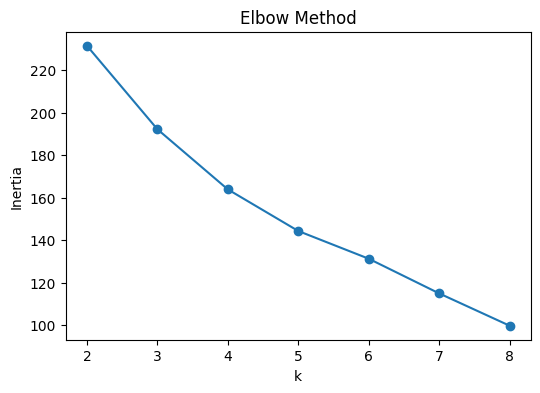

In [13]:
##want score to be lower

k_range = range(2, 9)


inertias = []

for k in k_range:
    km = KMeans(
        n_clusters=k,
        n_init=25,
        random_state=42
    )
    km.fit(X)
    inertias.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(k_range, inertias, marker="o")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


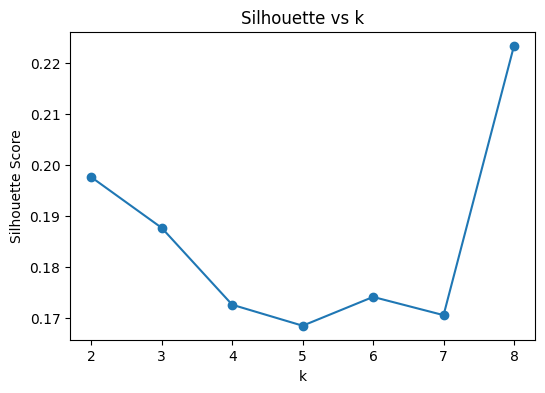

In [14]:
### want score to be higher

sil_scores = []

for k in k_range:
    km = KMeans(
        n_clusters=k,
        n_init=25,
        random_state=42
    )
    labels = km.fit_predict(X)
    score = silhouette_score(X, labels)
    sil_scores.append(score)

plt.figure(figsize=(6,4))
plt.plot(k_range, sil_scores, marker="o")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette vs k")
plt.show()


### k selection and k means calc begining


In [15]:
k = 6

kmeans = KMeans(
    n_clusters=k,
    n_init=50,
    random_state=42
)

cluster_df["cluster"] = kmeans.fit_predict(X)

centroids = pd.DataFrame(
    kmeans.cluster_centers_,
    columns=features.columns
)

centroids


,FGA_FREQUENCY,FG2A_FREQUENCY,FG3A_FREQUENCY,MIN,CONTESTED_SHOTS,CONTESTED_SHOTS_2PT,CONTESTED_SHOTS_3PT,DEFLECTIONS,CHARGES_DRAWN,DEF_LOOSE_BALLS_RECOVERED,DEF_BOXOUTS
0,0.0,-0.039511,0.039511,0.683855,0.459149,0.502255,0.121358,0.837491,-0.850988,0.704262,-0.460395
1,0.0,1.123428,-1.123428,-0.575754,0.225800,0.628472,-0.583307,-0.490465,-0.234369,-0.097560,-0.150447
2,0.0,-1.300212,1.300212,-1.529862,-0.616357,-0.861584,0.151689,-0.090938,0.217054,0.155486,0.895830
3,0.0,-0.644403,0.644403,0.286232,1.076111,0.535268,1.371337,-0.115359,0.821836,-0.601824,1.029434
4,0.0,-1.606731,1.606731,1.529862,-0.934285,-1.786551,1.040590,0.052860,0.142847,-1.079258,0.170002
5,0.0,0.125459,-0.125459,0.123376,-1.727288,-1.422630,-1.248170,-0.176092,0.755050,0.162346,-0.899470


In [16]:
cluster_means = (
    cluster_df
    .groupby("cluster")
    .mean(numeric_only=True)
)

cluster_df[["TEAM_NAME", "cluster"]].sort_values("cluster")


,TEAM_NAME,cluster
29,Detroit Pistons,0
15,Cleveland Cavaliers,0
11,Philadelphia 76ers,0
8,Atlanta Hawks,0
23,Houston Rockets,0
19,LA Clippers,0
25,Toronto Raptors,0
26,Brooklyn Nets,1
18,Orlando Magic,1
10,Minnesota Timberwolves,1


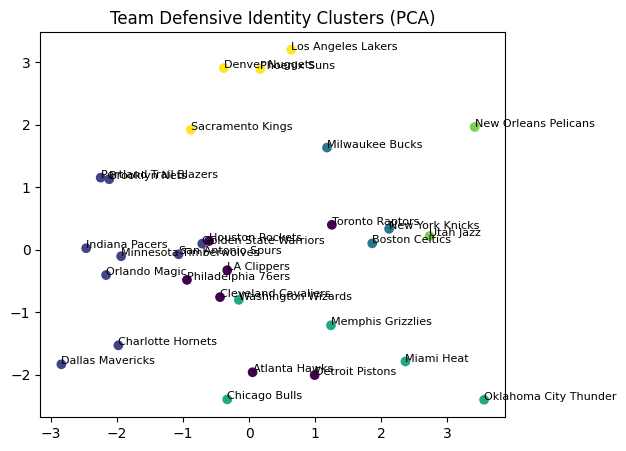

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=cluster_df["cluster"])
for i, name in enumerate(cluster_df["TEAM_NAME"]):
    plt.text(X_pca[i,0], X_pca[i,1], name, fontsize=8)
plt.title("Team Defensive Identity Clusters (PCA)")
plt.show()


### player lookup architechture


In [18]:
import time
from typing import Iterable, Dict, List, Optional, Tuple

import pandas as pd
from nba_api.stats.static import teams as nba_teams
from nba_api.stats.static import players as nba_players
from nba_api.stats.endpoints import playergamelogs


In [19]:
def build_team_maps() -> Tuple[Dict[str, int], Dict[int, str]]:
    """Returns (name_to_team_id, team_id_to_name) using nba_api static teams."""
    t = nba_teams.get_teams()
    name_to_id = {x["full_name"]: x["id"] for x in t}
    id_to_name = {x["id"]: x["full_name"] for x in t}
    return name_to_id, id_to_name


def build_player_map(active_only: bool = False) -> Dict[str, int]:
    """Returns name_to_player_id. active_only=True limits to active players."""
    plist = nba_players.get_active_players() if active_only else nba_players.get_players()
    return {p["full_name"]: p["id"] for p in plist}


def clusters_to_team_ids(
    cluster_df: pd.DataFrame,
    team_col: str = "TEAM_NAME",
    cluster_col: str = "cluster",
) -> Dict[int, List[int]]:
    """
    Returns: {cluster_number: [team_id, team_id, ...]}
    Uses TEAM_ID if present; otherwise maps from TEAM_NAME via nba_api static teams.
    """
    df = cluster_df.copy()

    # Normalize column names if needed
    if cluster_col not in df.columns and "Cluster" in df.columns:
        cluster_col = "Cluster"
    if team_col not in df.columns and "TEAM" in df.columns:
        team_col = "TEAM"

    # If TEAM_ID already exists, prefer it
    if "TEAM_ID" in df.columns:
        tmp = df[[cluster_col, "TEAM_ID"]].dropna()
        tmp["TEAM_ID"] = tmp["TEAM_ID"].astype(int)
        out: Dict[int, List[int]] = (
            tmp.groupby(cluster_col)["TEAM_ID"].apply(list).to_dict()
        )
        # ensure keys are ints
        return {int(k): v for k, v in out.items()}

    # Otherwise map by name
    name_to_id, _ = build_team_maps()

    def map_team_id(name: str) -> Optional[int]:
        if name in name_to_id:
            return name_to_id[name]
        # common fallback: allow abbreviations/alternate forms if you later add them
        return None

    df["TEAM_ID"] = df[team_col].map(map_team_id)
    missing = df[df["TEAM_ID"].isna()][team_col].unique().tolist()
    if missing:
        print("⚠️ Teams not mapped to TEAM_ID (check naming):", missing)

    tmp = df[[cluster_col, "TEAM_ID"]].dropna()
    tmp["TEAM_ID"] = tmp["TEAM_ID"].astype(int)

    out: Dict[int, List[int]] = tmp.groupby(cluster_col)["TEAM_ID"].apply(list).to_dict()
    return {int(k): v for k, v in out.items()}



def player_names_to_ids(
    player_names: Iterable[str],
    active_only: bool = False,
) -> List[int]:
    name_to_id = build_player_map(active_only=active_only)

    ids = []
    missing = []
    for n in player_names:
        n = n.strip()
        if not n:
            continue
        pid = name_to_id.get(n)
        if pid is None:
            missing.append(n)
        else:
            ids.append(pid)

    if missing:
        print("⚠️ Players not found (check spelling):", missing)

    return ids


def player_input_to_ids(player_input: str, active_only: bool = False) -> List[int]:
    names = [x.strip() for x in player_input.split(",")]
    return player_names_to_ids(names, active_only=active_only)


In [20]:
def fetch_player_vs_opponents(
    player_id: int,
    opponent_team_ids: List[int],
    season: str = "2025-26",
    season_type: str = "Regular Season",
    sleep_s: float = 0.8,
    max_retries: int = 2,
) -> pd.DataFrame:
    """
    Returns one DataFrame of all games for `player_id` vs any team in opponent_team_ids.
    """
    all_logs = []

    for opp_id in opponent_team_ids:
        for attempt in range(max_retries + 1):
            try:
                resp = playergamelogs.PlayerGameLogs(
                    season_nullable=season,
                    season_type_nullable=season_type,
                    player_id_nullable=player_id,
                    opp_team_id_nullable=opp_id,
                )
                df = resp.get_data_frames()[0]
                if not df.empty:
                    df = df.copy()
                    df["OPP_TEAM_ID"] = opp_id
                    all_logs.append(df)
                break
            except Exception as e:
                if attempt == max_retries:
                    print(f"❌ Failed: player_id={player_id} vs opp_id={opp_id}: {e}")
                else:
                    time.sleep(sleep_s * (attempt + 1))

        time.sleep(sleep_s)

    if not all_logs:
        return pd.DataFrame()

    out = pd.concat(all_logs, ignore_index=True)

    # Optional: readable opponent name
    _, id_to_name = build_team_maps()
    out["OPP_TEAM_NAME"] = out["OPP_TEAM_ID"].map(id_to_name)

    # Helpful sorting
    if "GAME_DATE" in out.columns:
        out = out.sort_values("GAME_DATE")

    return out



def fetch_players_vs_cluster(
    player_ids: List[int],
    cluster_team_ids: List[int],
    season: str = "2025-26",
    season_type: str = "Regular Season",
    sleep_s: float = 0.8,
) -> Dict[int, pd.DataFrame]:
    """
    Returns dict: {player_id: DataFrame_of_games_vs_cluster_teams}
    """
    results: Dict[int, pd.DataFrame] = {}
    for pid in player_ids:
        df = fetch_player_vs_opponents(
            player_id=pid,
            opponent_team_ids=cluster_team_ids,
            season=season,
            season_type=season_type,
            sleep_s=sleep_s,
        )
        results[pid] = df
    return results


In [29]:
# 1) Build mapping: cluster -> [team_ids]
cluster_to_team_ids = clusters_to_team_ids(cluster_df, team_col="TEAM_NAME", cluster_col="cluster")

# 2) Pick a cluster to test
target_cluster =3
opponent_ids = cluster_to_team_ids[target_cluster]
print("Cluster", target_cluster, "team IDs:", opponent_ids)

# 3) Get player IDs
# "Anthony Black,Desmond Bane,Wendell Carter Jr,Michael Porter Jr, Paolo Banchero, Dayron Sharpe, Lebron James,Deandre Ayton,Marcus Smart,Jake LaRavia,Jaxson Hayes"

# player_ids = player_input_to_ids("cooper-flagg", active_only=False)
# 4) Fetch logs
results = fetch_players_vs_cluster(
    # player_ids=player_ids,
    player_ids=[1631108],
    cluster_team_ids=opponent_ids,
    season="2025-26",
    sleep_s=0.8
)

# 5) View one



Cluster 3 team IDs: [1610612764, 1610612741, 1610612748, 1610612763, 1610612760]


In [30]:
results

{1631108:   SEASON_YEAR  PLAYER_ID   PLAYER_NAME NICKNAME     TEAM_ID TEAM_ABBREVIATION  \
 1     2025-26    1631108  Max Christie      Max  1610612742               DAL   
 7     2025-26    1631108  Max Christie      Max  1610612742               DAL   
 5     2025-26    1631108  Max Christie      Max  1610612742               DAL   
 0     2025-26    1631108  Max Christie      Max  1610612742               DAL   
 4     2025-26    1631108  Max Christie      Max  1610612742               DAL   
 3     2025-26    1631108  Max Christie      Max  1610612742               DAL   
 2     2025-26    1631108  Max Christie      Max  1610612742               DAL   
 6     2025-26    1631108  Max Christie      Max  1610612742               DAL   
 
           TEAM_NAME     GAME_ID            GAME_DATE      MATCHUP  ...  \
 1  Dallas Mavericks  0022500096  2025-10-24T00:00:00  DAL vs. WAS  ...   
 7  Dallas Mavericks  0022500119  2025-10-27T00:00:00  DAL vs. OKC  ...   
 5  Dallas Mavericks  0022

In [26]:
from IPython.display import display
player_id = "1631108"

for player_id, df in results.items():
    print(f"\n### Player ID: {player_id}")
    display(df)



### Player ID: 1


""



### Player ID: 6


""



### Player ID: 3


""



### Player ID: 0


,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,...,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,AVAILABLE_FLAG,MIN_SEC,TEAM_COUNT,OPP_TEAM_ID,OPP_TEAM_NAME
2003,2025-26,203991,Clint Capela,Clint,1610612745,HOU,Houston Rockets,0022500001,2025-10-21T00:00:00,HOU @ OKC,...,70,356,24,2,350,1,7:52,1,1610612760,Oklahoma City Thunder
2001,2025-26,1629006,Josh Okogie,Josh,1610612745,HOU,Houston Rockets,0022500001,2025-10-21T00:00:00,HOU @ OKC,...,239,258,24,2,263,1,19:58,1,1610612760,Oklahoma City Thunder
2000,2025-26,203500,Steven Adams,Steven,1610612745,HOU,Houston Rockets,0022500001,2025-10-21T00:00:00,HOU @ OKC,...,106,179,24,2,182,1,36:30,1,1610612760,Oklahoma City Thunder
1999,2025-26,1642263,Reed Sheppard,Reed,1610612745,HOU,Houston Rockets,0022500001,2025-10-21T00:00:00,HOU @ OKC,...,149,176,24,2,169,1,27:47,1,1610612760,Oklahoma City Thunder
1998,2025-26,1631095,Jabari Smith Jr.,Jabari,1610612745,HOU,Houston Rockets,0022500001,2025-10-21T00:00:00,HOU @ OKC,...,106,130,24,2,122,1,41:45,1,1610612760,Oklahoma City Thunder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,2025-26,1630194,Paul Reed,Paul,1610612765,DET,Detroit Pistons,0022500517,2026-01-07T00:00:00,DET vs. CHI,...,197,149,40,3,167,1,26:20,1,1610612741,Chicago Bulls
420,2025-26,1629750,Javonte Green,Javonte,1610612765,DET,Detroit Pistons,0022500517,2026-01-07T00:00:00,DET vs. CHI,...,36,169,40,3,174,1,25:26,1,1610612741,Chicago Bulls
421,2025-26,1629130,Duncan Robinson,Duncan,1610612765,DET,Detroit Pistons,0022500517,2026-01-07T00:00:00,DET vs. CHI,...,235,237,40,3,195,1,22:34,1,1610612741,Chicago Bulls
1590,2025-26,1642846,Ace Bailey,Ace,1610612762,UTA,Utah Jazz,0022500525,2026-01-07T00:00:00,UTA @ OKC,...,174,354,24,2,360,1,10:14,1,1610612760,Oklahoma City Thunder



### Player ID: 8


""


In [24]:
cluster_to_team_ids = clusters_to_team_ids(cluster_df, team_col="TEAM_NAME", cluster_col="cluster")

# 2) Pick a cluster to test
target_cluster =1
opponent_ids = cluster_to_team_ids[target_cluster]
print("Cluster", target_cluster, "team IDs:", opponent_ids)


player_ids_2 = player_input_to_ids("Cooper Flagg,Max Christie,Anthony Davis,Daniel Gafford,kyle flipowski,Brice Sensabaugh,Keyonte George,Andrew Nembhard,Aaron Nesmith,Pascal Siakam,Jay Huff,Jarace Walker,Moussa Diabaté,Kon Knueppel,Brandon Miller,Miles Bridges,Tidjane Salaun", active_only=False)
# 4) Fetch logs
results_2 = fetch_players_vs_cluster(
    player_ids=player_ids_2,
    cluster_team_ids=opponent_ids,
    season="2025-26",
    sleep_s=0.8
)

Cluster 1 team IDs: [1610612742, 1610612766, 1610612750, 1610612759, 1610612757, 1610612744, 1610612754, 1610612753, 1610612751]
⚠️ Players not found (check spelling): ['Cooper Flagg', 'kyle flipowski', 'Moussa Diabaté', 'Kon Knueppel', 'Tidjane Salaun']


In [25]:
for player_id, df in results_2.items():
    print(f"\n### Player ID: {player_id}")
    display(df)


### Player ID: 1631108


,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,...,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,AVAILABLE_FLAG,MIN_SEC,TEAM_COUNT,OPP_TEAM_ID,OPP_TEAM_NAME
1,2025-26,1631108,Max Christie,Max,1610612742,DAL,Dallas Mavericks,0022500004,2025-10-22T00:00:00,DAL vs. SAS,...,1,1,1,1,1,1,25:57,1,1610612759,San Antonio Spurs
5,2025-26,1631108,Max Christie,Max,1610612742,DAL,Dallas Mavericks,0022500133,2025-10-29T00:00:00,DAL vs. IND,...,1,1,1,1,1,1,33:20,1,1610612754,Indiana Pacers
3,2025-26,1631108,Max Christie,Max,1610612742,DAL,Dallas Mavericks,0022500238,2025-11-16T00:00:00,DAL vs. POR,...,1,2,1,1,2,1,28:19,1,1610612757,Portland Trail Blazers
0,2025-26,1631108,Max Christie,Max,1610612742,DAL,Dallas Mavericks,0022500246,2025-11-17T00:00:00,DAL @ MIN,...,1,1,1,1,1,1,18:45,1,1610612750,Minnesota Timberwolves
6,2025-26,1631108,Max Christie,Max,1610612742,DAL,Dallas Mavericks,0022501214,2025-12-12T00:00:00,DAL vs. BKN,...,1,1,1,1,1,1,33:07,1,1610612751,Brooklyn Nets
4,2025-26,1631108,Max Christie,Max,1610612742,DAL,Dallas Mavericks,0022500011,2025-12-25T00:00:00,DAL @ GSW,...,1,1,1,1,1,1,33:32,1,1610612744,Golden State Warriors
2,2025-26,1631108,Max Christie,Max,1610612742,DAL,Dallas Mavericks,0022500457,2025-12-29T00:00:00,DAL @ POR,...,2,1,1,1,1,1,28:40,1,1610612757,Portland Trail Blazers



### Player ID: 203076


,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,...,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,AVAILABLE_FLAG,MIN_SEC,TEAM_COUNT,OPP_TEAM_ID,OPP_TEAM_NAME
0,2025-26,203076,Anthony Davis,Anthony,1610612742,DAL,Dallas Mavericks,0022500004,2025-10-22T00:00:00,DAL vs. SAS,...,1,1,1,1,1,1,32:29,1,1610612759,San Antonio Spurs
2,2025-26,203076,Anthony Davis,Anthony,1610612742,DAL,Dallas Mavericks,0022500133,2025-10-29T00:00:00,DAL vs. IND,...,1,1,1,1,1,1,6:36,1,1610612754,Indiana Pacers
3,2025-26,203076,Anthony Davis,Anthony,1610612742,DAL,Dallas Mavericks,0022501214,2025-12-12T00:00:00,DAL vs. BKN,...,1,1,1,1,1,1,32:41,1,1610612751,Brooklyn Nets
1,2025-26,203076,Anthony Davis,Anthony,1610612742,DAL,Dallas Mavericks,0022500011,2025-12-25T00:00:00,DAL @ GSW,...,1,1,1,1,1,1,10:53,1,1610612744,Golden State Warriors



### Player ID: 1629655


,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,...,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,AVAILABLE_FLAG,MIN_SEC,TEAM_COUNT,OPP_TEAM_ID,OPP_TEAM_NAME
1,2025-26,1629655,Daniel Gafford,Daniel,1610612742,DAL,Dallas Mavericks,0022500238,2025-11-16T00:00:00,DAL vs. POR,...,1,1,2,1,1,1,31:11,1,1610612757,Portland Trail Blazers
2,2025-26,1629655,Daniel Gafford,Daniel,1610612742,DAL,Dallas Mavericks,0022500011,2025-12-25T00:00:00,DAL @ GSW,...,1,1,1,1,1,1,15:23,1,1610612744,Golden State Warriors
0,2025-26,1629655,Daniel Gafford,Daniel,1610612742,DAL,Dallas Mavericks,0022500457,2025-12-29T00:00:00,DAL @ POR,...,2,2,1,1,2,1,25:34,1,1610612757,Portland Trail Blazers



### Player ID: 1641729


,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,...,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,AVAILABLE_FLAG,MIN_SEC,TEAM_COUNT,OPP_TEAM_ID,OPP_TEAM_NAME
6,2025-26,1641729,Brice Sensabaugh,Brice,1610612762,UTA,Utah Jazz,0022500135,2025-10-29T00:00:00,UTA vs. POR,...,1,2,1,1,2,1,13:34,1,1610612757,Portland Trail Blazers
1,2025-26,1641729,Brice Sensabaugh,Brice,1610612762,UTA,Utah Jazz,0022500150,2025-11-02T00:00:00,UTA @ CHA,...,1,1,1,1,1,1,8:39,1,1610612766,Charlotte Hornets
3,2025-26,1641729,Brice Sensabaugh,Brice,1610612762,UTA,Utah Jazz,0022500036,2025-11-07T00:00:00,UTA @ MIN,...,2,2,1,1,2,1,23:05,1,1610612750,Minnesota Timberwolves
2,2025-26,1641729,Brice Sensabaugh,Brice,1610612762,UTA,Utah Jazz,0022500205,2025-11-10T00:00:00,UTA vs. MIN,...,1,1,1,1,1,1,11:11,1,1610612750,Minnesota Timberwolves
9,2025-26,1641729,Brice Sensabaugh,Brice,1610612762,UTA,Utah Jazz,0022500211,2025-11-11T00:00:00,UTA vs. IND,...,1,1,1,1,1,1,15:58,1,1610612754,Indiana Pacers
8,2025-26,1641729,Brice Sensabaugh,Brice,1610612762,UTA,Utah Jazz,0022500291,2025-11-24T00:00:00,UTA @ GSW,...,2,1,1,1,1,1,18:31,1,1610612744,Golden State Warriors
11,2025-26,1641729,Brice Sensabaugh,Brice,1610612762,UTA,Utah Jazz,0022500335,2025-12-04T00:00:00,UTA @ BKN,...,1,1,1,1,1,1,21:50,1,1610612751,Brooklyn Nets
0,2025-26,1641729,Brice Sensabaugh,Brice,1610612762,UTA,Utah Jazz,0022501224,2025-12-15T00:00:00,UTA vs. DAL,...,1,1,1,1,1,1,21:39,1,1610612742,Dallas Mavericks
10,2025-26,1641729,Brice Sensabaugh,Brice,1610612762,UTA,Utah Jazz,0022500393,2025-12-20T00:00:00,UTA vs. ORL,...,1,1,1,1,1,1,24:36,1,1610612753,Orlando Magic
4,2025-26,1641729,Brice Sensabaugh,Brice,1610612762,UTA,Utah Jazz,0022500440,2025-12-27T00:00:00,UTA @ SAS,...,1,1,1,1,1,1,33:37,1,1610612759,San Antonio Spurs



### Player ID: 1641718


,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,...,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,AVAILABLE_FLAG,MIN_SEC,TEAM_COUNT,OPP_TEAM_ID,OPP_TEAM_NAME
6,2025-26,1641718,Keyonte George,Keyonte,1610612762,UTA,Utah Jazz,0022500135,2025-10-29T00:00:00,UTA vs. POR,...,1,1,1,1,1,1,32:02,1,1610612757,Portland Trail Blazers
1,2025-26,1641718,Keyonte George,Keyonte,1610612762,UTA,Utah Jazz,0022500150,2025-11-02T00:00:00,UTA @ CHA,...,1,1,1,1,1,1,33:15,1,1610612766,Charlotte Hornets
3,2025-26,1641718,Keyonte George,Keyonte,1610612762,UTA,Utah Jazz,0022500036,2025-11-07T00:00:00,UTA @ MIN,...,2,2,1,1,2,1,25:54,1,1610612750,Minnesota Timberwolves
2,2025-26,1641718,Keyonte George,Keyonte,1610612762,UTA,Utah Jazz,0022500205,2025-11-10T00:00:00,UTA vs. MIN,...,1,1,1,1,1,1,36:03,1,1610612750,Minnesota Timberwolves
9,2025-26,1641718,Keyonte George,Keyonte,1610612762,UTA,Utah Jazz,0022500211,2025-11-11T00:00:00,UTA vs. IND,...,1,1,1,1,1,1,26:44,1,1610612754,Indiana Pacers
8,2025-26,1641718,Keyonte George,Keyonte,1610612762,UTA,Utah Jazz,0022500291,2025-11-24T00:00:00,UTA @ GSW,...,1,1,1,1,1,1,37:45,1,1610612744,Golden State Warriors
11,2025-26,1641718,Keyonte George,Keyonte,1610612762,UTA,Utah Jazz,0022500335,2025-12-04T00:00:00,UTA @ BKN,...,1,1,1,1,1,1,31:27,1,1610612751,Brooklyn Nets
0,2025-26,1641718,Keyonte George,Keyonte,1610612762,UTA,Utah Jazz,0022501224,2025-12-15T00:00:00,UTA vs. DAL,...,1,1,1,1,1,1,40:51,1,1610612742,Dallas Mavericks
10,2025-26,1641718,Keyonte George,Keyonte,1610612762,UTA,Utah Jazz,0022500393,2025-12-20T00:00:00,UTA vs. ORL,...,1,1,1,1,1,1,41:33,1,1610612753,Orlando Magic
4,2025-26,1641718,Keyonte George,Keyonte,1610612762,UTA,Utah Jazz,0022500440,2025-12-27T00:00:00,UTA @ SAS,...,1,1,1,1,1,1,34:46,1,1610612759,San Antonio Spurs



### Player ID: 1629614


,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,...,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,AVAILABLE_FLAG,MIN_SEC,TEAM_COUNT,OPP_TEAM_ID,OPP_TEAM_NAME
2,2025-26,1629614,Andrew Nembhard,Andrew,1610612754,IND,Indiana Pacers,0022500196,2025-11-09T00:00:00,IND @ GSW,...,1,1,1,1,1,1,29:44,1,1610612744,Golden State Warriors
0,2025-26,1629614,Andrew Nembhard,Andrew,1610612754,IND,Indiana Pacers,0022500256,2025-11-19T00:00:00,IND vs. CHA,...,1,1,1,1,1,1,33:57,1,1610612766,Charlotte Hornets
4,2025-26,1629614,Andrew Nembhard,Andrew,1610612754,IND,Indiana Pacers,0022500464,2025-12-31T00:00:00,IND vs. ORL,...,1,2,2,1,2,1,30:41,1,1610612753,Orlando Magic
1,2025-26,1629614,Andrew Nembhard,Andrew,1610612754,IND,Indiana Pacers,0022500476,2026-01-02T00:00:00,IND vs. SAS,...,1,1,1,1,1,1,35:33,1,1610612759,San Antonio Spurs
3,2025-26,1629614,Andrew Nembhard,Andrew,1610612754,IND,Indiana Pacers,0022500495,2026-01-04T00:00:00,IND @ ORL,...,2,1,1,1,1,1,35:29,1,1610612753,Orlando Magic



### Player ID: 1630174


,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,...,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,AVAILABLE_FLAG,MIN_SEC,TEAM_COUNT,OPP_TEAM_ID,OPP_TEAM_NAME
1,2025-26,1630174,Aaron Nesmith,Aaron,1610612754,IND,Indiana Pacers,0022500110,2025-10-26T00:00:00,IND @ MIN,...,1,1,1,1,1,1,35:21,1,1610612750,Minnesota Timberwolves
0,2025-26,1630174,Aaron Nesmith,Aaron,1610612754,IND,Indiana Pacers,0022500133,2025-10-29T00:00:00,IND @ DAL,...,1,1,1,1,1,1,36:55,1,1610612742,Dallas Mavericks
3,2025-26,1630174,Aaron Nesmith,Aaron,1610612754,IND,Indiana Pacers,0022500144,2025-11-01T00:00:00,IND vs. GSW,...,1,1,1,1,1,1,35:08,1,1610612744,Golden State Warriors
6,2025-26,1630174,Aaron Nesmith,Aaron,1610612754,IND,Indiana Pacers,0022500173,2025-11-05T00:00:00,IND vs. BKN,...,1,1,1,1,1,1,32:09,1,1610612751,Brooklyn Nets
5,2025-26,1630174,Aaron Nesmith,Aaron,1610612754,IND,Indiana Pacers,0022500464,2025-12-31T00:00:00,IND vs. ORL,...,1,2,1,1,2,1,31:36,1,1610612753,Orlando Magic
2,2025-26,1630174,Aaron Nesmith,Aaron,1610612754,IND,Indiana Pacers,0022500476,2026-01-02T00:00:00,IND vs. SAS,...,1,1,1,1,1,1,29:05,1,1610612759,San Antonio Spurs
4,2025-26,1630174,Aaron Nesmith,Aaron,1610612754,IND,Indiana Pacers,0022500495,2026-01-04T00:00:00,IND @ ORL,...,2,1,1,1,1,1,34:08,1,1610612753,Orlando Magic



### Player ID: 1627783


,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,...,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,AVAILABLE_FLAG,MIN_SEC,TEAM_COUNT,OPP_TEAM_ID,OPP_TEAM_NAME
2,2025-26,1627783,Pascal Siakam,Pascal,1610612754,IND,Indiana Pacers,0022500110,2025-10-26T00:00:00,IND @ MIN,...,1,1,1,1,1,1,36:31,1,1610612750,Minnesota Timberwolves
0,2025-26,1627783,Pascal Siakam,Pascal,1610612754,IND,Indiana Pacers,0022500133,2025-10-29T00:00:00,IND @ DAL,...,1,1,1,1,1,1,36:54,1,1610612742,Dallas Mavericks
4,2025-26,1627783,Pascal Siakam,Pascal,1610612754,IND,Indiana Pacers,0022500144,2025-11-01T00:00:00,IND vs. GSW,...,1,1,1,1,1,1,38:01,1,1610612744,Golden State Warriors
7,2025-26,1627783,Pascal Siakam,Pascal,1610612754,IND,Indiana Pacers,0022500173,2025-11-05T00:00:00,IND vs. BKN,...,1,1,1,1,1,1,36:04,1,1610612751,Brooklyn Nets
1,2025-26,1627783,Pascal Siakam,Pascal,1610612754,IND,Indiana Pacers,0022500256,2025-11-19T00:00:00,IND vs. CHA,...,1,1,1,1,1,1,36:37,1,1610612766,Charlotte Hornets
6,2025-26,1627783,Pascal Siakam,Pascal,1610612754,IND,Indiana Pacers,0022500464,2025-12-31T00:00:00,IND vs. ORL,...,1,2,1,1,2,1,33:49,1,1610612753,Orlando Magic
3,2025-26,1627783,Pascal Siakam,Pascal,1610612754,IND,Indiana Pacers,0022500476,2026-01-02T00:00:00,IND vs. SAS,...,1,1,1,1,1,1,35:52,1,1610612759,San Antonio Spurs
5,2025-26,1627783,Pascal Siakam,Pascal,1610612754,IND,Indiana Pacers,0022500495,2026-01-04T00:00:00,IND @ ORL,...,2,1,1,1,1,1,36:27,1,1610612753,Orlando Magic



### Player ID: 1630643


,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,...,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,AVAILABLE_FLAG,MIN_SEC,TEAM_COUNT,OPP_TEAM_ID,OPP_TEAM_NAME
2,2025-26,1630643,Jay Huff,Jay,1610612754,IND,Indiana Pacers,0022500110,2025-10-26T00:00:00,IND @ MIN,...,1,1,1,1,1,1,15:58,1,1610612750,Minnesota Timberwolves
0,2025-26,1630643,Jay Huff,Jay,1610612754,IND,Indiana Pacers,0022500133,2025-10-29T00:00:00,IND @ DAL,...,1,1,1,1,1,1,20:60,1,1610612742,Dallas Mavericks
5,2025-26,1630643,Jay Huff,Jay,1610612754,IND,Indiana Pacers,0022500144,2025-11-01T00:00:00,IND vs. GSW,...,1,2,2,1,2,1,3:20,1,1610612744,Golden State Warriors
8,2025-26,1630643,Jay Huff,Jay,1610612754,IND,Indiana Pacers,0022500173,2025-11-05T00:00:00,IND vs. BKN,...,1,1,1,1,1,1,17:42,1,1610612751,Brooklyn Nets
4,2025-26,1630643,Jay Huff,Jay,1610612754,IND,Indiana Pacers,0022500196,2025-11-09T00:00:00,IND @ GSW,...,2,1,1,1,1,1,21:38,1,1610612744,Golden State Warriors
1,2025-26,1630643,Jay Huff,Jay,1610612754,IND,Indiana Pacers,0022500256,2025-11-19T00:00:00,IND vs. CHA,...,1,1,1,1,1,1,27:08,1,1610612766,Charlotte Hornets
7,2025-26,1630643,Jay Huff,Jay,1610612754,IND,Indiana Pacers,0022500464,2025-12-31T00:00:00,IND vs. ORL,...,2,2,1,1,2,1,10:31,1,1610612753,Orlando Magic
3,2025-26,1630643,Jay Huff,Jay,1610612754,IND,Indiana Pacers,0022500476,2026-01-02T00:00:00,IND vs. SAS,...,1,1,1,1,1,1,19:34,1,1610612759,San Antonio Spurs
6,2025-26,1630643,Jay Huff,Jay,1610612754,IND,Indiana Pacers,0022500495,2026-01-04T00:00:00,IND @ ORL,...,1,1,1,1,1,1,17:14,1,1610612753,Orlando Magic



### Player ID: 1641716


,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,...,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,AVAILABLE_FLAG,MIN_SEC,TEAM_COUNT,OPP_TEAM_ID,OPP_TEAM_NAME
2,2025-26,1641716,Jarace Walker,Jarace,1610612754,IND,Indiana Pacers,0022500110,2025-10-26T00:00:00,IND @ MIN,...,1,1,1,1,1,1,26:20,1,1610612750,Minnesota Timberwolves
0,2025-26,1641716,Jarace Walker,Jarace,1610612754,IND,Indiana Pacers,0022500133,2025-10-29T00:00:00,IND @ DAL,...,1,1,1,1,1,1,35:43,1,1610612742,Dallas Mavericks
5,2025-26,1641716,Jarace Walker,Jarace,1610612754,IND,Indiana Pacers,0022500144,2025-11-01T00:00:00,IND vs. GSW,...,1,1,1,1,1,1,29:57,1,1610612744,Golden State Warriors
8,2025-26,1641716,Jarace Walker,Jarace,1610612754,IND,Indiana Pacers,0022500173,2025-11-05T00:00:00,IND vs. BKN,...,1,1,1,1,1,1,32:11,1,1610612751,Brooklyn Nets
4,2025-26,1641716,Jarace Walker,Jarace,1610612754,IND,Indiana Pacers,0022500196,2025-11-09T00:00:00,IND @ GSW,...,2,2,1,1,2,1,31:33,1,1610612744,Golden State Warriors
1,2025-26,1641716,Jarace Walker,Jarace,1610612754,IND,Indiana Pacers,0022500256,2025-11-19T00:00:00,IND vs. CHA,...,1,1,1,1,1,1,25:34,1,1610612766,Charlotte Hornets
7,2025-26,1641716,Jarace Walker,Jarace,1610612754,IND,Indiana Pacers,0022500464,2025-12-31T00:00:00,IND vs. ORL,...,2,1,1,1,1,1,17:44,1,1610612753,Orlando Magic
3,2025-26,1641716,Jarace Walker,Jarace,1610612754,IND,Indiana Pacers,0022500476,2026-01-02T00:00:00,IND vs. SAS,...,1,1,1,1,1,1,11:13,1,1610612759,San Antonio Spurs
6,2025-26,1641716,Jarace Walker,Jarace,1610612754,IND,Indiana Pacers,0022500495,2026-01-04T00:00:00,IND @ ORL,...,1,2,1,1,2,1,16:23,1,1610612753,Orlando Magic



### Player ID: 1641706


,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,...,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,AVAILABLE_FLAG,MIN_SEC,TEAM_COUNT,OPP_TEAM_ID,OPP_TEAM_NAME
2,2025-26,1641706,Brandon Miller,Brandon,1610612766,CHA,Charlotte Hornets,0022500080,2025-10-22T00:00:00,CHA vs. BKN,...,1,1,1,1,1,1,30:30,1,1610612751,Brooklyn Nets
1,2025-26,1641706,Brandon Miller,Brandon,1610612766,CHA,Charlotte Hornets,0022500424,2025-12-26T00:00:00,CHA @ ORL,...,1,1,1,1,1,1,36:10,1,1610612753,Orlando Magic
0,2025-26,1641706,Brandon Miller,Brandon,1610612766,CHA,Charlotte Hornets,0022500462,2025-12-31T00:00:00,CHA vs. GSW,...,1,1,1,1,1,1,36:21,1,1610612744,Golden State Warriors



### Player ID: 1628970


,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,...,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,AVAILABLE_FLAG,MIN_SEC,TEAM_COUNT,OPP_TEAM_ID,OPP_TEAM_NAME
5,2025-26,1628970,Miles Bridges,Miles,1610612766,CHA,Charlotte Hornets,0022500080,2025-10-22T00:00:00,CHA vs. BKN,...,1,1,1,1,1,1,30:51,1,1610612751,Brooklyn Nets
3,2025-26,1628970,Miles Bridges,Miles,1610612766,CHA,Charlotte Hornets,0022500138,2025-10-30T00:00:00,CHA vs. ORL,...,2,2,2,1,2,1,32:58,1,1610612753,Orlando Magic
0,2025-26,1628970,Miles Bridges,Miles,1610612766,CHA,Charlotte Hornets,0022500143,2025-11-01T00:00:00,CHA vs. MIN,...,1,1,1,1,1,1,36:41,1,1610612750,Minnesota Timberwolves
1,2025-26,1628970,Miles Bridges,Miles,1610612766,CHA,Charlotte Hornets,0022500256,2025-11-19T00:00:00,CHA @ IND,...,1,1,1,1,1,1,35:24,1,1610612754,Indiana Pacers
4,2025-26,1628970,Miles Bridges,Miles,1610612766,CHA,Charlotte Hornets,0022500312,2025-12-01T00:00:00,CHA @ BKN,...,2,2,2,1,2,1,30:23,1,1610612751,Brooklyn Nets
2,2025-26,1628970,Miles Bridges,Miles,1610612766,CHA,Charlotte Hornets,0022500424,2025-12-26T00:00:00,CHA @ ORL,...,1,1,1,1,1,1,34:48,1,1610612753,Orlando Magic
